In [2]:
print("!pip install parimal")

!pip install parimal


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams["figure.figsize"]=(20, 10)

In [4]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
# 1st Way to analyze
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
# 2nd Way to analyze
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
data_2 = data.drop(columns=['availability', 'balcony', 'area_type', 'society'], axis=1)
data_2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
data_2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
data_3 = data_2.dropna()

In [11]:
data_3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
data_3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
str = "100 parimal"
val = int(str[0])
val

1

In [14]:
data_3['bhk'] = data_3['size'].apply(lambda x: int(x.split(' ')[0]))
data_3.head()

C:\Users\H P\AppData\Local\Temp\ipykernel_12296\3609750350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['bhk'] = data_3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
data_3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
data_3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [18]:
data_3[~data_3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
data_3.shape

(13246, 6)

In [20]:
def convert(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [21]:
data_4 = data_3.copy()
data_4['total_sqft'] = data_4['total_sqft'].apply(convert)
data_4['total_sqft'].head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [22]:
data_4.loc[137]

location      8th Phase JP Nagar
size                       2 BHK
total_sqft                1073.5
bath                         2.0
price                     54.005
bhk                            2
Name: 137, dtype: object

In [23]:
data_4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
data_5 = data_4.copy()
data_5['cost_1sqft'] = data_5['price']*100000 / data_5['total_sqft']
data_5.head()

,location,size,total_sqft,bath,price,bhk,cost_1sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
data_5.location = data_5.location.apply(lambda x: x.strip())
location_stats = data_5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [26]:
location_stats = data_5['location'].value_counts()
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [27]:
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_less10 = location_stats[location_stats<=10]
location_stats_less10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [29]:
data_5[data_5.total_sqft/data_5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,cost_1sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
data_6 = data_5[~(data_5.total_sqft/data_5.bhk<300)]
data_6.shape

(12502, 7)

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.cost_1sqft)
        st = np.std(subdf.cost_1sqft)
        reduced_df = subdf[(subdf.cost_1sqft>(m-st)) & (subdf.cost_1sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

data_7 = remove_pps_outliers(data_6)
data_7.shape    

(9267, 7)

In [33]:
data_7.head()

,location,size,total_sqft,bath,price,bhk,cost_1sqft
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.0,4,4761.904762
3,1st Block HRBR Layout,3 BHK,2300.0,3.0,80.0,3,3478.260870
4,1st Block HRBR Layout,2 BHK,1250.0,2.0,67.0,2,5360.000000


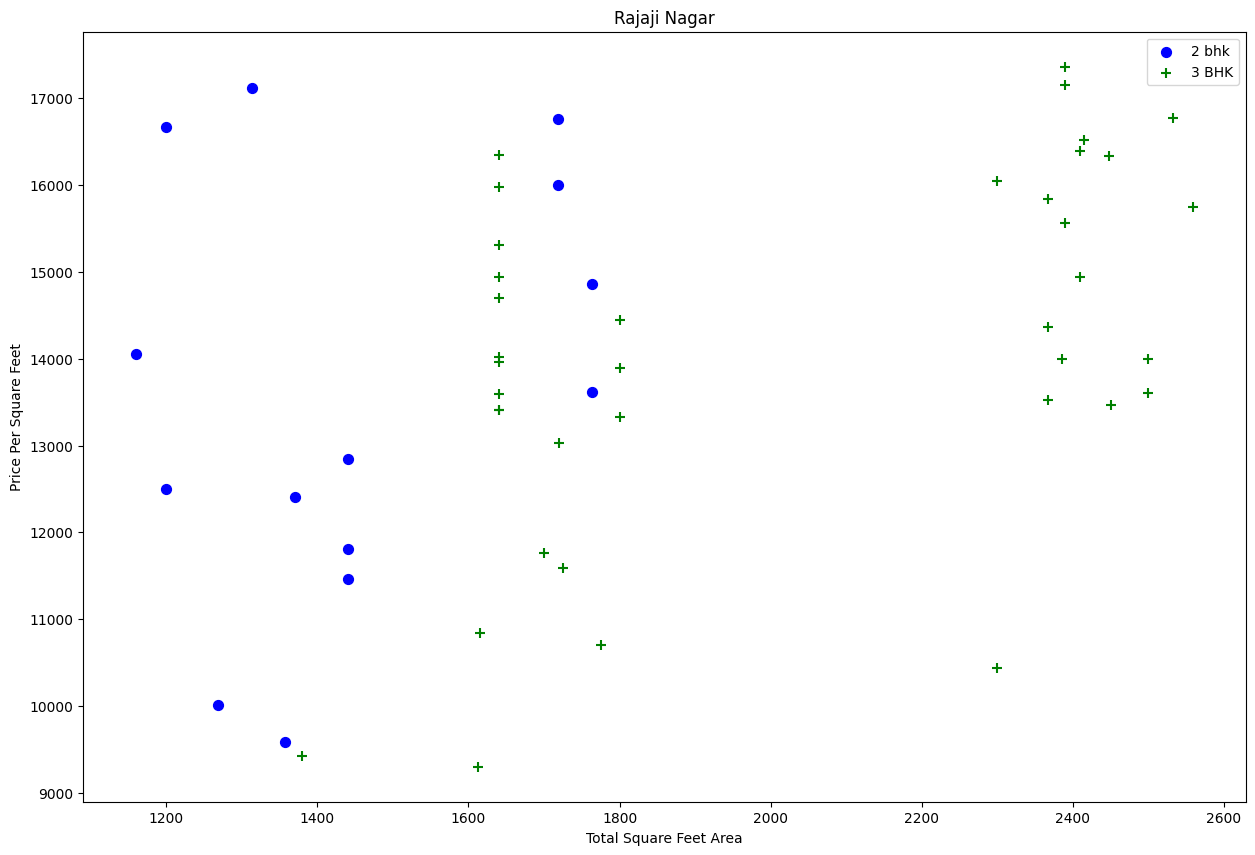

In [35]:
def plot_scatter_chart(data, location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.cost_1sqft, color='blue', label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.cost_1sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(data_7, "Rajaji Nagar")    